# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine `Logistische Regression` aufzubauen.

*-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!*

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.

Diese Information geben mir Zeit mich vorzubereiten auf das Problem

Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.


**Bedenke das du deine Daten immer hinterfragen solltest!!**

In [176]:
import pandas as pd

In [177]:
# Hier wird der Download für den Datensatz vorbereitet
file_id = '1uujka4TJygnHSrai5rDmao8z9SeP_PsE'
download_link = f"https://drive.google.com/uc?id={file_id}"

In [187]:
# Einen Datensatz mit Pandas laden
df = pd.read_csv(download_link, sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df.shape

(891, 12)

Um die Übersichtlichkeit beizubehalten kann man Spalten entfern mit folgender Funktion:

In [ ]:
df.drop(columns=["Spalte"], inplace=True) #<- Füge hier deine Spalte ein die du entferenen willst

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Anpassung der Datentypen
Bevor Daten richtig Manipuliert werden ist es von wichtigkeit die Datentypen anzupassen
Welche Datentypen es gibt kannst du im Leitfaden nachlesen unter Punkt 1.3.

Dabei haben wir folgenden eingabe möglichkeiten:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`


**Entscheide nun im folgenden welcher Datentyp am besten wäre für  deine Daten:**

In [156]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [85]:
df['Survived'] = df['Survived'].astype("category")
# df['Age'] = df['Age'].astype("string")
# df['Name'] = df['Name'].astype("string")
# df['Sex'] = df['Sex'].astype("string")
# df['Ticket'] = df['Ticket'].astype("string")
# df['Cabin'] = df['Cabin'].astype("string")
# df['Embarked'] = df['Embarked'].astype("category")

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,2.31,29.70,0.52,0.38,32.20
std,257.35,0.84,14.53,1.10,0.81,49.69
min,1.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,2.00,20.12,0.00,0.00,7.91
50%,446.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,3.00,38.00,1.00,0.00,31.00
max,891.00,3.00,80.00,8.00,6.00,512.33


## Fehleden Werte:
Der Umgang mit fehlenden Werte ist wichtig und sollte möglichst für jeden Spalte individuell durch geführt werden

Die Überlegung sollte immer sein kann ich die Werte sinnvoll ersetzten?

In [188]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Im Folgenden sehen wir das Beispiel an unseren Datensatz und sehen
- Age fehlen 177 Werte
- Cabin fehlend 687 Werte
- Embarked fehlen 2 Werte.

Wie würdet ihr mit den fehlenden Werten umgehen begründet eure Entscheidung?

In [ ]:
# Lösche die Zeilen mit NaN values 
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl
#df = df.fillna()

# Fülle die NaN values mit dem Durchschnittswert der Spalte
#df["wage"]= df["wage"].fillna(df["wage"].mean()) # nur eine Spalte werden die Daten ersetzt
#df = df.fillna(df.mean()) #<- mean(), mode(), median() / Alle Spalten werden ersetzt

In [189]:
#df["Age"] = df["Age"].astype("int")

df = df.dropna(subset=['Age'])
df = df.drop(columns=["Cabin"])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [121]:
df_filtered_sur = df[(df["Survived"] == 0)]
df_filtered_dead = df[(df["Survived"] == 1)]
df_filtered_sur.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S


## Datenfilterung
---

In [118]:
df_filtered = df[(df["Survived"] == 0) &
                     (df["Pclass"] == 1)]

df_filtered_sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,C
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,S


## Visualisation
---

In [6]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

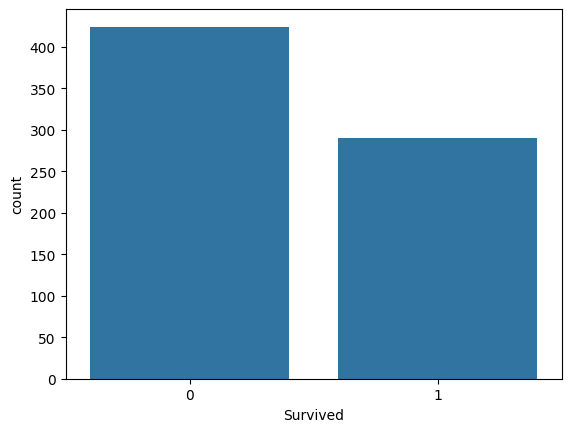

In [136]:
sns.countplot(x='Survived',data=df)


<Axes: xlabel='Survived', ylabel='count'>

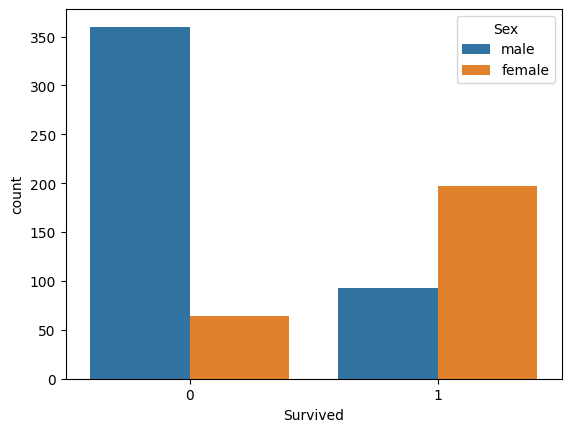

In [137]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

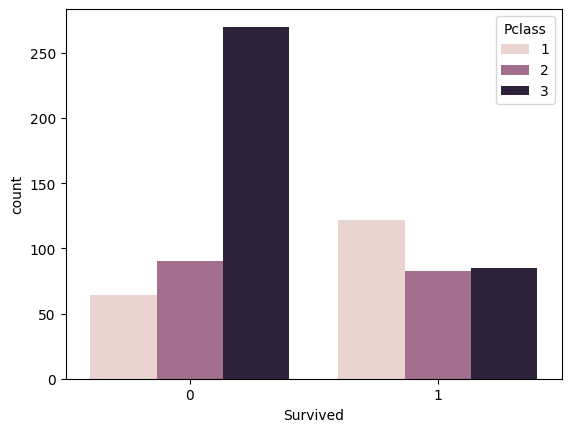

In [138]:
sns.countplot(x='Survived',hue='Pclass',data=df)

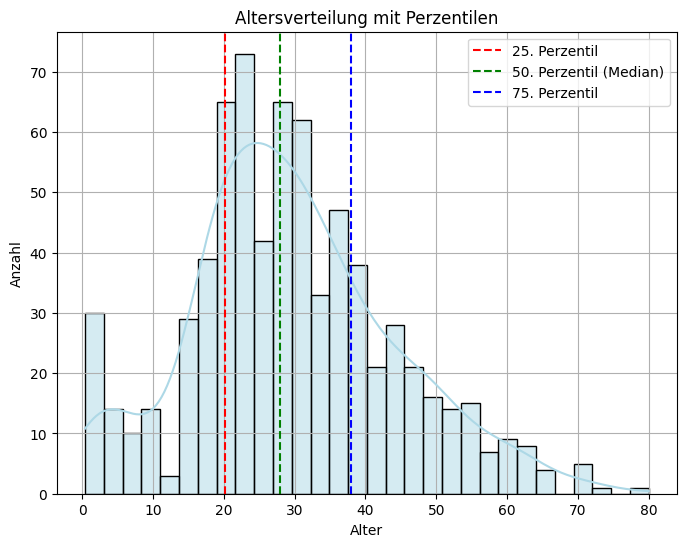

In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daten ohne NaN-Werte
data_age = df['Age'].dropna()

# Berechne die Perzentile (25., 50., 75.)
q25_age = np.percentile(data_age, 25)
q50_age = np.percentile(data_age, 50)  # Median
q75_age = np.percentile(data_age, 75)

# Erstelle den Plot
plt.figure(figsize=(8, 6))

# Plot der Verteilung
sns.histplot(data_age, kde=True, bins=30, color="lightblue")

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_age, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_age, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_age, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.grid(True)
plt.title('Altersverteilung mit Perzentilen')
plt.xlabel('Alter')
plt.ylabel('Anzahl')

plt.show()


## Logistische Regression
---

Da eine Logistische Regression ein berechnung mit nummerischen Werte sind müssen wir zu nächst Überlegen welche Spalten ein relevanten beitrag zu unserer Regression beitragen

In [157]:
df.value_counts("Fare")

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Name: count, Length: 248, dtype: int64

In [190]:
df = df.drop(columns=["Ticket","Parch","Embarked","Name","SibSp","PassengerId"])
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [191]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass'], dtype=float)

In [192]:
df.head()

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,1.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [193]:
y = df['Survived']
X = df.drop(columns=["Survived"])

In [194]:
X

,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,38.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,35.0,53.1000,1.0,0.0,1.0,0.0,0.0
4,35.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
885,39.0,29.1250,1.0,0.0,0.0,0.0,1.0
886,27.0,13.0000,0.0,1.0,0.0,1.0,0.0
887,19.0,30.0000,1.0,0.0,1.0,0.0,0.0
889,26.0,30.0000,0.0,1.0,1.0,0.0,0.0


In [195]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [197]:
# Die Genauigkeit (Accuracy) / ROC AUC des Modells auf dem Testdatensatz wird berechnet und ausgegeben.

print('Accuracy: ', accuracy_score(model.predict(X), y))
print('ROC AUC: ', roc_auc_score(y, model.predict_proba(X)[:, 1]))

Accuracy:  0.7913165266106442
ROC AUC:  0.8521104424202992


In [198]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X)
confusion_matrix(y, y_predicted)

array([[357,  67],
       [ 82, 208]])

In [199]:
from sklearn.metrics import classification_report

print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.76      0.72      0.74       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



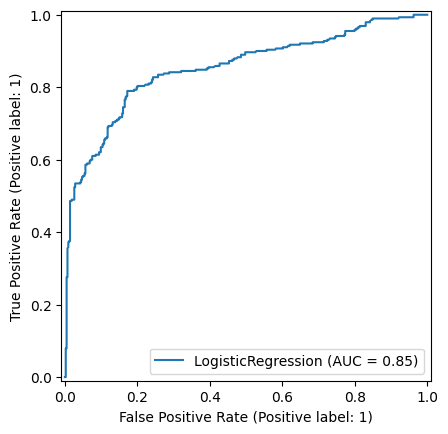

In [205]:
from sklearn.metrics import RocCurveDisplay

# Berechne und zeige die ROC-Kurve
RocCurveDisplay.from_estimator(model, X, y)

# Plot anzeigen
plt.show()
